# Taylor integration of the Kepler problem

Here, we try to reproduce __exactly__ the [Kepler problem integration](http://nbviewer.jupyter.org/github/JuliaDiff/TaylorSeries.jl/blob/master/examples/1-KeplerProblem.ipynb) made by Luis Benet using [JuliaDiff/TaylorSeries.jl](https://github.com/JuliaDiff/TaylorSeries.jl).

In cartesian coordinates over the orbital plane, the Hamiltonian for the Kepler problem reads:

$$
H_{\mathrm{Kepler}}=\frac{1}{2\mu}(p_x^2+p_y^2)-\frac{\mu}{\sqrt{x^2+y^2}}
$$

where $\mu=G(m_1+m_2)$, $G$ is the gravitational constant, $m_1$ is the mass of the primary body and $m_2$ is the mass of the secondary body. Using Hamilton equations, we can obtain the equations of motion for the Kepler problem:

$$
\begin{align}
\dot x &= u \\
\dot y &= v \\
\dot u &= -\frac{\mu x}{(x^2+y^2)^{3/2}}\\
\dot u &= -\frac{\mu y}{(x^2+y^2)^{3/2}}\\
\\
\end{align}
$$

Note that the canonical momenta are $p_x$ and $p_y$, while $u$ and $v$ are, respectively, the $x$ and $y$ components of the velocity; i.e., $p_x = \mu u$ and $p_y = \mu v$.


We start by including all relevant packages:

In [50]:
using TaylorIntegration, PyPlot

Some parameters necessary for the integration:

+ $\mu$: the gravitational parameter
+ `q0`: the initial state
+ `order`: the order of the Taylor expansion
+ `t_max`: the final time of the integration
+ `abs_tol`: the absolute tolerance
+ `n_iter`: the number of time-steps

In [46]:
const μ = 1.0
const q0 = [0.19999999999999996, 0.0, 0.0, 3.0] # initial condition
const order = 28
const t0 = 0.0
const t_max = 10000*(2π) # we are just taking a wild guess about the period ;)
const abs_tol = 1.0E-20
const steps = 500000

500000

As usual, we write down the equations of motion in a `function`. `q` represents the system state, with the first component being the current value of the independent variable. Hence, its evolution is given by $\dot t = 1$. `params` represents the parameters of a given system of differential equations. In the Kepler problem case, the only parameter is $\mu$, the mass parameter.

In [47]:
function kepler_problem(t, q)
    r_p3d2 = (q[1]^2+q[2]^2)^(3/2)
    
    return [q[3], q[4], -μ*q[1]/r_p3d2, -μ*q[2]/r_p3d2]
end

kepler_problem (generic function with 1 method)

The Taylor integration:

In [48]:
?taylorinteg

search: taylorinteg TaylorIntegration



```
taylorinteg(f, x0, t0, tmax, order, abs_tol; keyword... )
```

This is a general-purpose Taylor integrator for the explicit ODE $\dot{x}=f(x)$ with initial condition specified by `x0` at time `t0`. It returns a vector with the values of time (independent variable), and a vector (of type `typeof(x0)`) with the computed values of the dependent variables. The integration stops when time is larger than `tmax`, or the number of saved steps is larger than `maxsteps`.

The integrator uses polynomial expansions on the independent variable of order `order` and the parameter `abs_tol` serves to define the time step using the last two Taylor coefficients of the expansions.

The current keyword argument is `maxsteps=500`.


In [49]:
#@time t, q = taylorinteg(kepler_problem, q0, t0, 1.0, order, abs_tol, maxsteps=steps); #warm-up lap
@time t, q = taylorinteg(kepler_problem, q0, t0, t_max, order, abs_tol, maxsteps=steps);

 49.585085 seconds (621.09 M allocations: 39.178 GB, 10.48% gc time)


The final state:

In [21]:
t[end], q[end,:]

(628.3268600807583,
1x4 Array{Float64,2}:
 0.199135  0.0249521  -0.207217  2.98707)

In [24]:
x = q[:,1]
y = q[:,2]
u = q[:,3]
v = q[:,4];

The energy function:

In [28]:
H = (x_, y_, u_, v_) -> 0.5.*(u_.*u_+v_.*v_)-μ./sqrt(x_.*x_+y_.*y_)

(anonymous function)

The energy during each time-step:

In [29]:
E = H(x, y, u, v);

The initial energy:

In [30]:
E0=E[1]

-0.5000000000000009

The relative error in the energy is $\delta E$:

In [31]:
δE = (E-E0)/(E0);

A $\delta E$ vs $t$ plot:

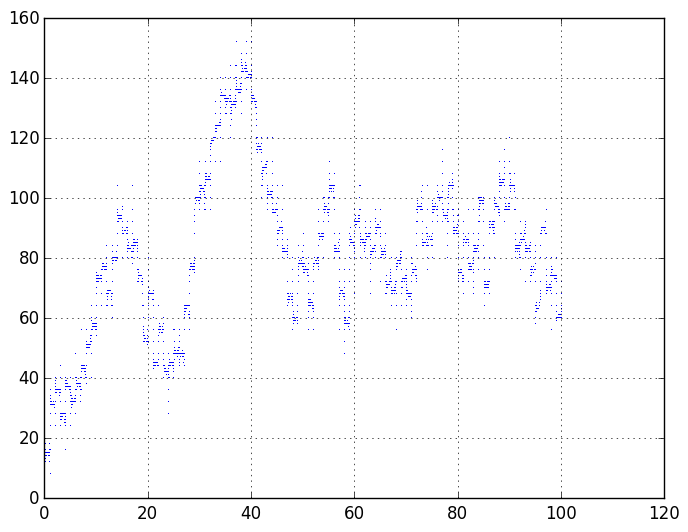

In [32]:
grid(true)
plot(t/(2π), δE/eps(Float64), ",");

How does the energy error distribute around zero?

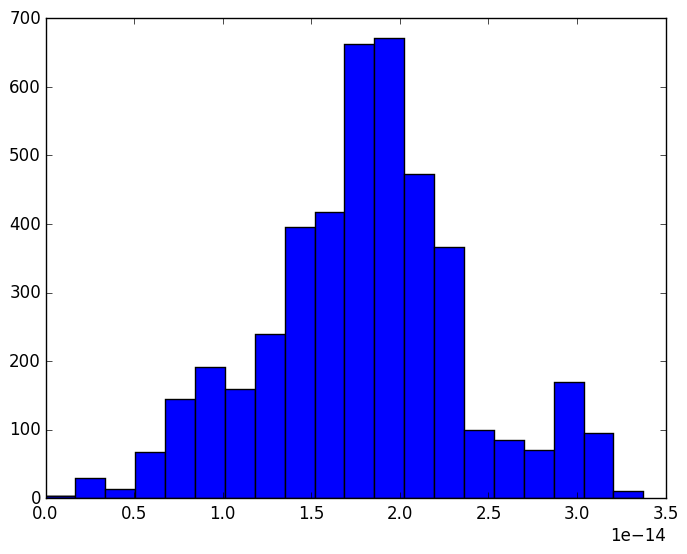

In [33]:
h = plt[:hist](δE, 20);

The angular momentum function:

In [37]:
ang_mom = (x_, y_, u_, v_) -> x_.*v_-y.*u_

(anonymous function)

The angular momentum during each time-step:

In [38]:
L = ang_mom(x, y, u, v);

The initial angular momentum:

In [39]:
L0 = L[1]

0.5999999999999999

The relative error in the angular momentum during the integration is $\delta L$:

In [40]:
δL = (L-L0)/L0;

A $\delta L$ vs $t$ plot:

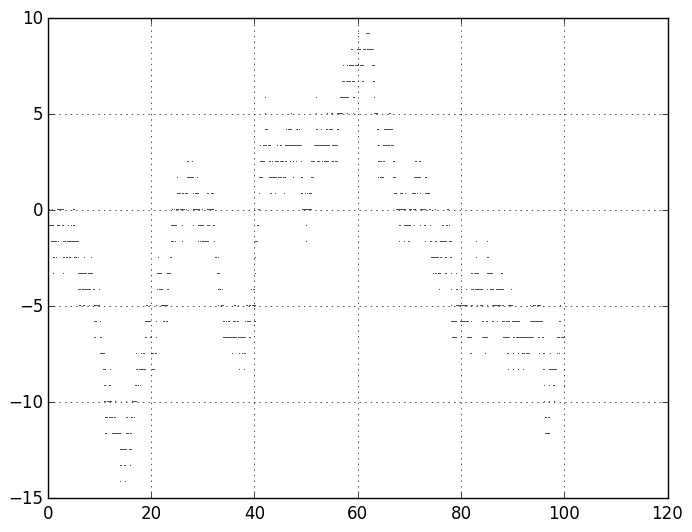

In [41]:
grid(true)
plot(t/(2π), δL/eps(Float64), "g,");

What is the distribution of the angular momentum relative error?

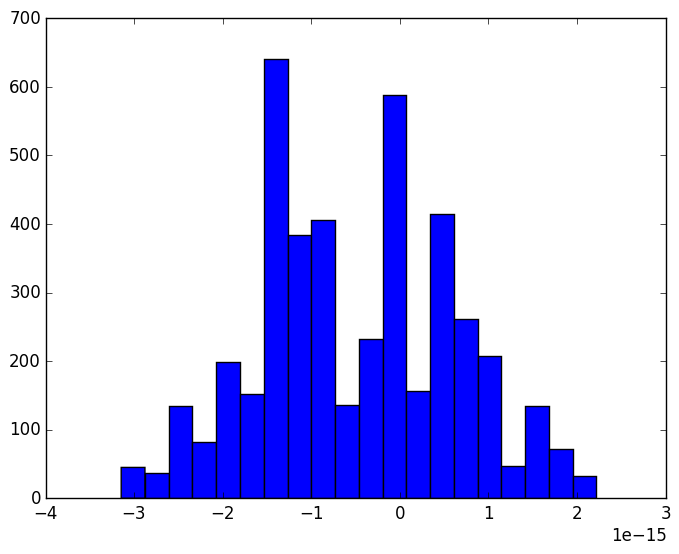

In [42]:
h = plt[:hist]( δL, 20 );

A $\delta E$, $\delta L$ plot vs $t$:

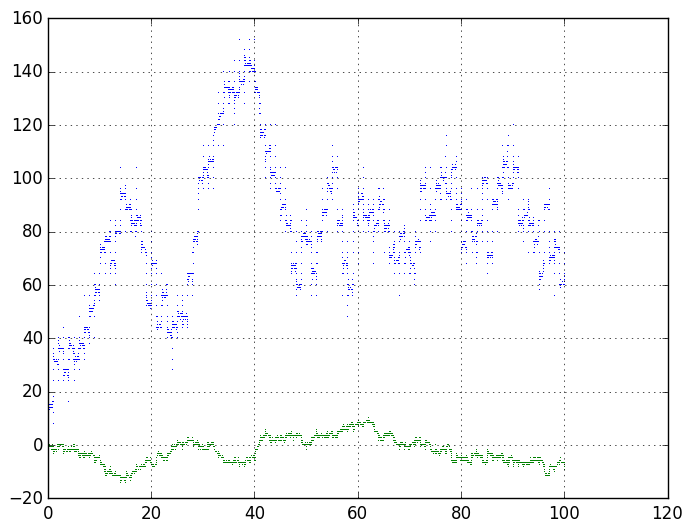

In [43]:
grid(true)
plot(t/(2π), δE/eps(Float64), "b,", t/(2π), δL/eps(Float64), "g,");